In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
print(data.columns)
print(data.shape)
print(data.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
MD_x = data.iloc[:, :11] == 'Yes'
MD_x = MD_x.astype(int)

print(MD_x.mean().round(2))



yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
pca = PCA()
pca.fit(MD_x)

standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(proportion_variance)

In [6]:
summary_df = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_proportion
})

In [7]:
print(summary_df)


    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [8]:
import matplotlib.pyplot as plt


[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

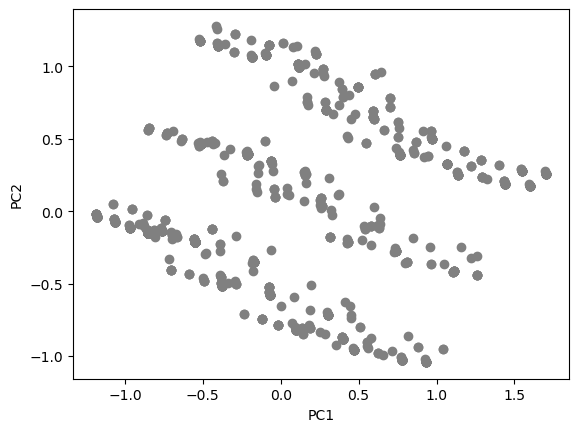

In [9]:
print(pca.explained_variance_)
print(pca.components_)

plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

In [11]:
np.random.seed(1234)

def run_kmeans(X, cluster_range, nrep=10):
    results = []
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(X)
        results.append(kmeans)
    return results


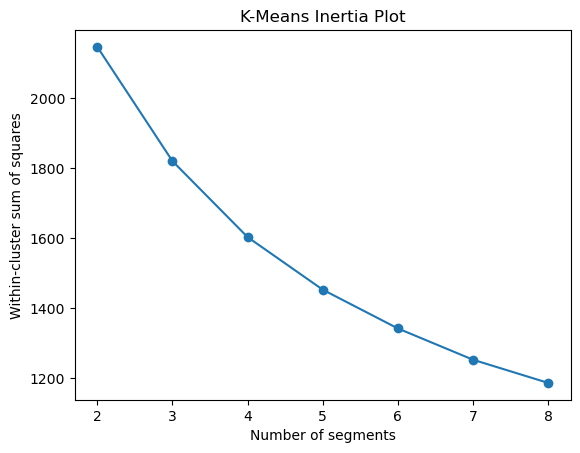

In [12]:
cluster_range = range(2, 9)
MD_kmeans = run_kmeans(MD_x, cluster_range)

inertias = [kmeans.inertia_ for kmeans in MD_kmeans]
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares')
plt.title('K-Means Inertia Plot')
plt.show()

In [18]:
from sklearn.utils import resample

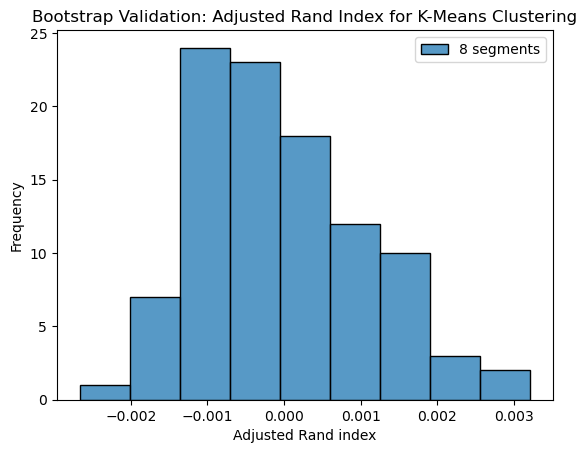

In [20]:
def bootstrap_kmeans(X, kmeans, nboot=100):
    aris = []
    for _ in range(nboot):
        X_bootstrap = resample(X, random_state=np.random.randint(10000))
        kmeans_bootstrap = KMeans(n_clusters=kmeans.n_clusters, n_init=10, random_state=1234)
        kmeans_bootstrap.fit(X_bootstrap)
        ari = adjusted_rand_score(kmeans.labels_, kmeans_bootstrap.labels_)
        aris.append(ari)
    return aris
bootstrap_aris = {}
for kmeans in MD_kmeans:
    aris = bootstrap_kmeans(MD_x, kmeans)
bootstrap_aris[kmeans.n_clusters] = aris

for k, aris in bootstrap_aris.items():
    sns.histplot(aris, kde=False, label=f'{k} segments')

plt.xlabel('Adjusted Rand index')
plt.ylabel('Frequency')
plt.title('Bootstrap Validation: Adjusted Rand Index for K-Means Clustering')
plt.legend()
plt.show()

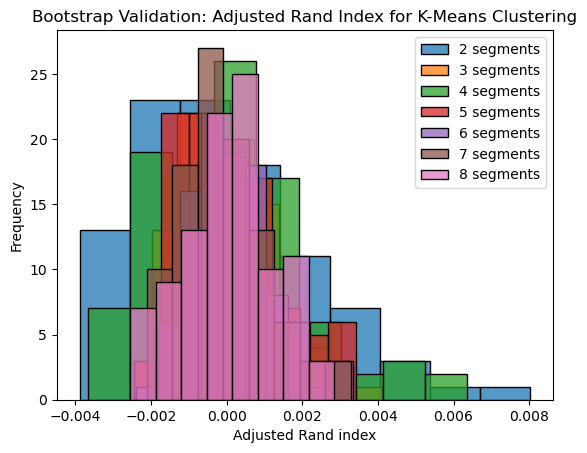

In [15]:
bootstrap_aris = {}
for kmeans in MD_kmeans:
    aris = bootstrap_kmeans(MD_x, kmeans)
    bootstrap_aris[kmeans.n_clusters] = aris

for k, aris in bootstrap_aris.items():
    sns.histplot(aris, kde=False, label=f'{k} segments')

plt.xlabel('Adjusted Rand index')
plt.ylabel('Frequency')
plt.title('Bootstrap Validation: Adjusted Rand Index for K-Means Clustering')
plt.legend()
plt.show()

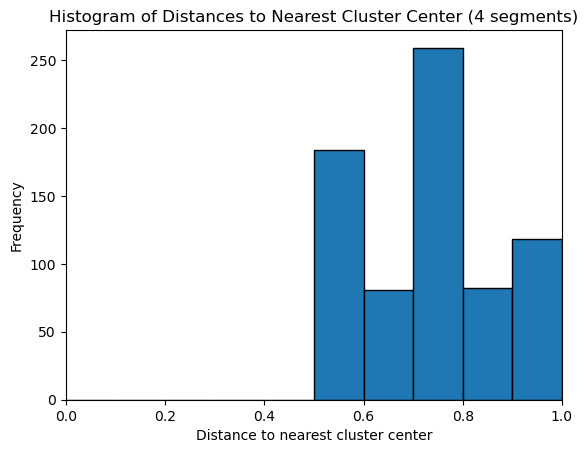

In [16]:
MD_k4 = MD_kmeans[2]  # 4 clusters corresponds to index 2 in 0-based index

plt.hist(MD_k4.transform(MD_x).min(axis=1), bins=np.arange(0, 1.1, 0.1), edgecolor='black')
plt.xlim(0, 1)
plt.xlabel('Distance to nearest cluster center')
plt.ylabel('Frequency')
plt.title('Histogram of Distances to Nearest Cluster Center (4 segments)')
plt.show()

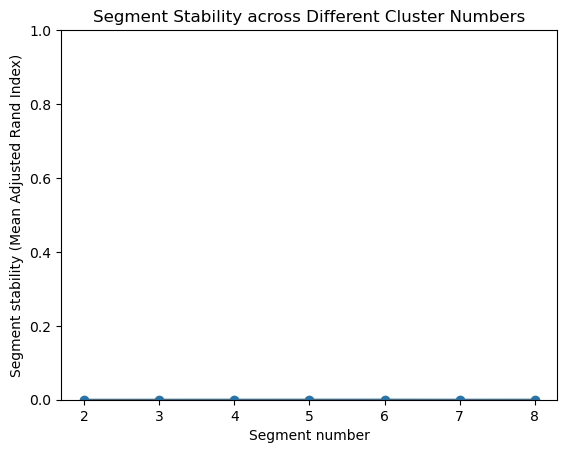

In [17]:
segment_stability = []
for i, kmeans in enumerate(MD_kmeans):
    aris = bootstrap_aris[kmeans.n_clusters]
    mean_ari = np.mean(aris)
    segment_stability.append(mean_ari)

plt.plot(cluster_range, segment_stability, marker='o')
plt.ylim(0, 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability (Mean Adjusted Rand Index)')
plt.title('Segment Stability across Different Cluster Numbers')
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:

np.random.seed(1234)

results = {}
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type='full', n_init=10, random_state=1234)
    gmm.fit(MD_x)
    results[k] = gmm

for k, model in results.items():
    print(f"k={k}, logLik={model.lower_bound_:.2f}, AIC={model.aic(MD_x):.2f}, BIC={model.bic(MD_x):.2f}")

MD_m4 = results[4]

k=2, logLik=7.67, AIC=-21985.64, BIC=-21167.03
k=3, logLik=10.99, AIC=-31471.11, BIC=-30240.54
k=4, logLik=13.42, AIC=-38371.93, BIC=-36729.42
k=5, logLik=15.39, AIC=-43931.56, BIC=-41877.10
k=6, logLik=19.63, AIC=-56110.08, BIC=-53643.68
k=7, logLik=17.05, AIC=-48466.42, BIC=-45588.06
k=8, logLik=20.57, AIC=-58522.03, BIC=-55231.73


In [23]:

kmeans_labels = MD_k4.labels_
gmm_labels = MD_m4.predict(MD_x)

# Create a crosstab of KMeans and Gaussian Mixture Model (GMM) clusters
cross_tab = pd.crosstab(kmeans_labels, gmm_labels, rownames=['kmeans'], colnames=['mixture'])
print(cross_tab)


mixture    0    1    2    3
kmeans                     
0         29   50  268   17
1         28  188    0   24
2        152    0  362   19
3        123    0    0  193


In [24]:
# Refit the Gaussian Mixture Model based on KMeans clusters
MD_m4a = GaussianMixture(n_components=4, covariance_type='full', n_init=10, random_state=1234)
MD_m4a.fit(MD_x, y=kmeans_labels)

# Create a crosstab of the new GMM clusters
gmm_labels_new = MD_m4a.predict(MD_x)
cross_tab_new = pd.crosstab(kmeans_labels, gmm_labels_new, rownames=['kmeans'], colnames=['mixture'])
print(cross_tab_new)


mixture    0    1    2    3
kmeans                     
0         29   50  268   17
1         28  188    0   24
2        152    0  362   19
3        123    0    0  193


In [36]:
logLik_m4a = MD_m4a.score(MD_x) * MD_x.shape[0]  # Multiply by number of samples
logLik_m4 = MD_m4.score(MD_x) * MD_x.shape[0]

print(f'Log Likelihood of MD.m4a: {logLik_m4a:.3f}')
print(f'Log Likelihood of MD.m4: {logLik_m4:.3f}')




Log Likelihood of MD.m4a: 19496.964
Log Likelihood of MD.m4: 19496.964


In [37]:
like_counts = data['Like'].value_counts().sort_index(ascending=False)
print(like_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [52]:

data = pd.DataFrame({
    'Like': ["I hate it!-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!+5"]
})

like_mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}

data['Like.n'] = data['Like'].map(like_mapping)

data['Like.n'] = 6 - data['Like.n']

like_n_counts = data['Like.n'].value_counts().sort_index()
print(like_n_counts)


Like.n
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: count, dtype: int64


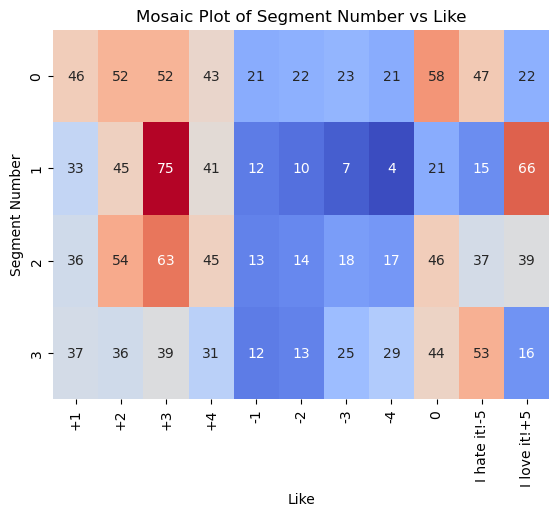

In [51]:

data_encoded = pd.get_dummies(data.iloc[:, :-1])

kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(data_encoded)
data['segment'] = kmeans.labels_

contingency_table = pd.crosstab(data['segment'], data['Like'])

sns.heatmap(contingency_table, annot=True, cmap="coolwarm", cbar=False)
plt.title("Mosaic Plot of Segment Number vs Like")
plt.xlabel("Like")
plt.ylabel("Segment Number")
plt.show()


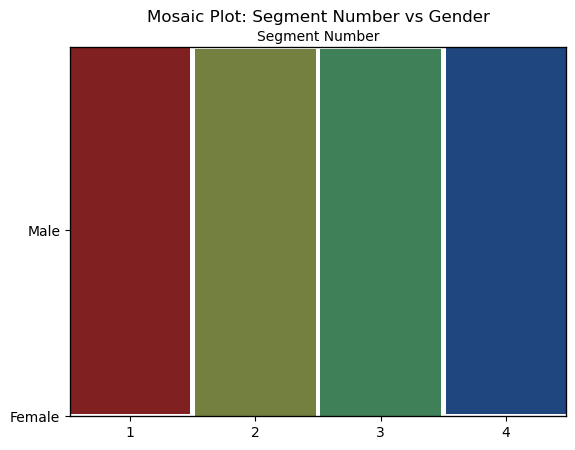

In [55]:
from statsmodels.graphics.mosaicplot import mosaic

# Assuming `k4` is the cluster assignment and `mcdonalds` is the DataFrame
# Replace this with actual data
k4 = pd.Series([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])
mcdonalds = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male']
})

# Step 1: Create a contingency table
contingency_table = pd.crosstab(k4, mcdonalds['Gender'])

# Step 2: Create the mosaic plot
mosaic(contingency_table.stack(), title="Mosaic Plot: Segment Number vs Gender", gap=0.01, labelizer=lambda k: '')
plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.show()




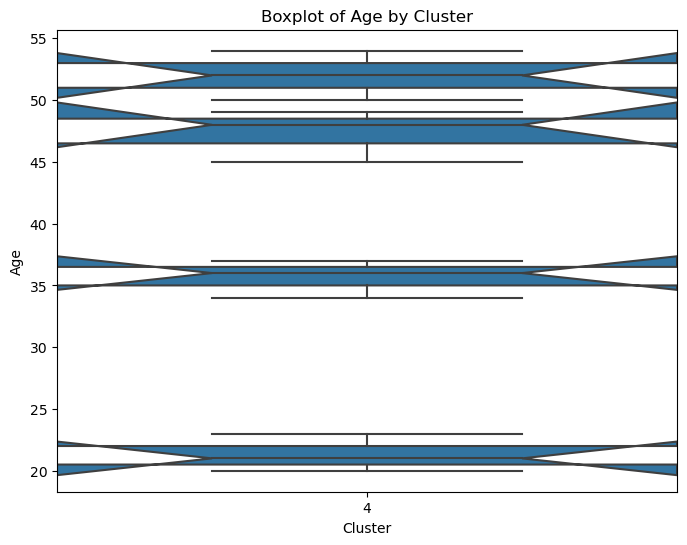

In [57]:


# Sample data setup
k4 = pd.Series([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])
mcdonalds = pd.DataFrame({
    'Age': [20, 34, 45, 50, 23, 37, 48, 54, 21, 36, 49, 52],
    'Cluster': k4
})

# Step 1: Combine Age and k4 into a DataFrame
data = pd.DataFrame({
    'Age': mcdonalds['Age'],
    'Cluster': k4
})

# Step 2: Calculate width based on the number of observations in each cluster
counts = data['Cluster'].value_counts().sort_index()
widths = counts / counts.max()

# Step 3: Create the boxplot with varying widths and notches
plt.figure(figsize=(8, 6))

for i, width in enumerate(widths):
    sns.boxplot(x=data['Cluster'][data['Cluster'] == (i + 1)],
                y=data['Age'][data['Cluster'] == (i + 1)],
                width=width, notch=True)

plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Boxplot of Age by Cluster')
plt.show()


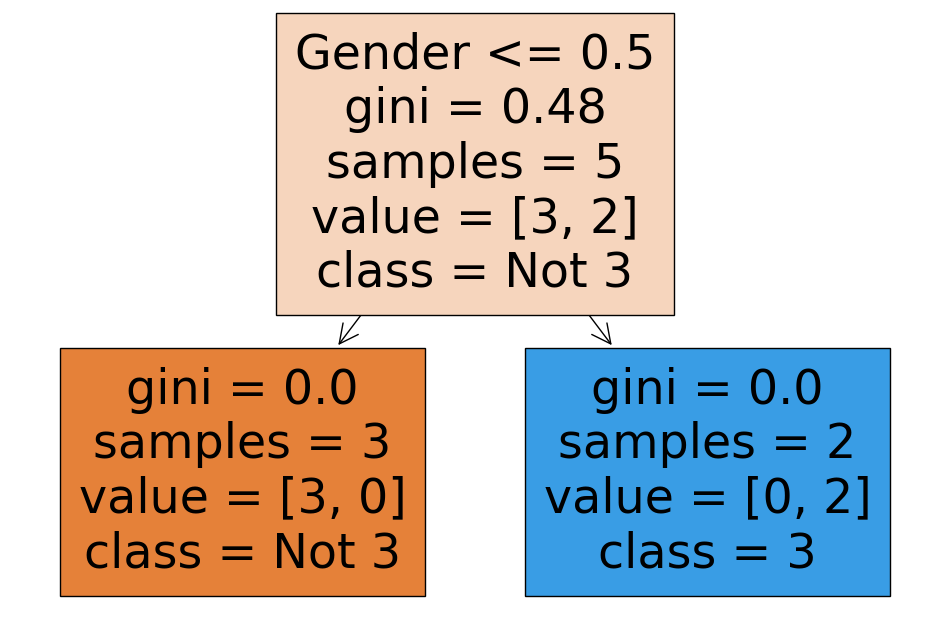

In [58]:

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Sample data preparation
data = {
    'Like': [1, 2, 3, 1, 2],  # Example data; replace with actual data
    'Age': [30, 45, 60, 35, 50],
    'VisitFrequency': ['Every month', 'Every week', 'Every six months', 'Every month', 'Every week'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'k4': [1, 3, 2, 3, 1]  # Target variable
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert categorical variables to numeric
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].astype('category').cat.codes
mcdonalds['Gender'] = mcdonalds['Gender'].astype('category').cat.codes

# Define features and target
X = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = mcdonalds['k4'] == 3  # Create binary target variable (True if k4 is 3, else False)


clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

# Plot the tree
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed
tree.plot_tree(clf, feature_names=['Like', 'Age', 'VisitFrequency', 'Gender'], class_names=['Not 3', '3'], filled=True, ax=ax)
plt.show()


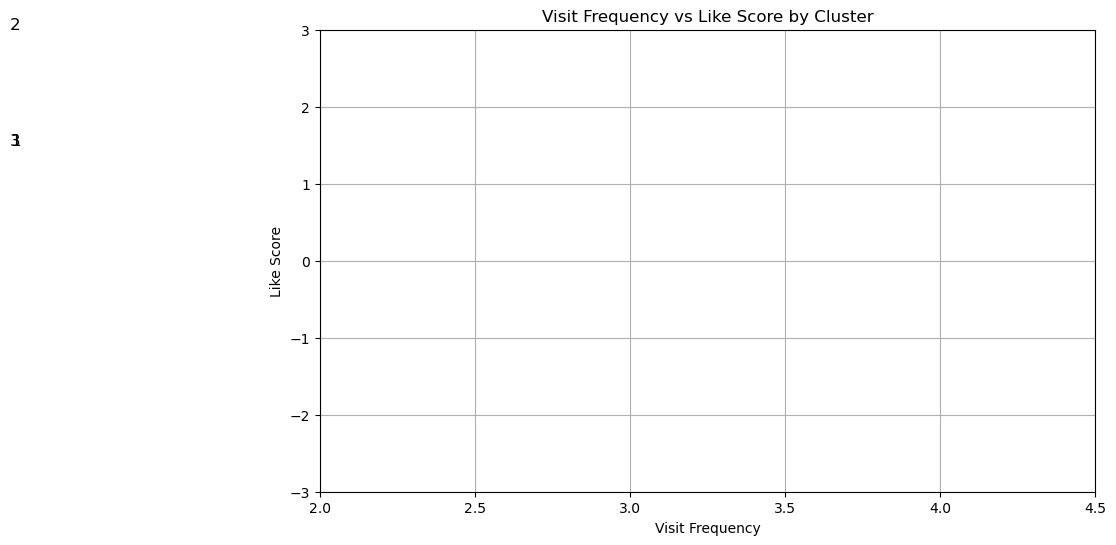

In [59]:


# Sample data preparation (use actual data)
data = {
    'VisitFrequency': ['Every month', 'Every week', 'Every six months', 'Every month', 'Every week'],
    'Like': [1, 2, 3, 1, 2],  # Example data; replace with actual data
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'k4': [1, 3, 2, 3, 1]  # Cluster assignments
}

# Convert to DataFrame
mcdonalds = pd.DataFrame(data)

# Convert categorical variables to numeric codes
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].astype('category').cat.codes
mcdonalds['Gender'] = mcdonalds['Gender'].astype('category').cat.codes

# Calculate means for each cluster
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like'].mean()
female = mcdonalds.groupby('k4')['Gender'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=10 * female, alpha=0.5)  # Scale size by proportion of females
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text labels to the points
for i in visit.index:
    plt.text(visit[i], like[i], str(i), fontsize=12)

plt.xlabel('Visit Frequency')
plt.ylabel('Like Score')
plt.title('Visit Frequency vs Like Score by Cluster')
plt.grid(True)
plt.show()
